Logic is for 1D data

In [ ]:
# --- STEP 1: Import Libraries & Load Data ---
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Keras has the MNIST dataset built-in, which makes it super easy to load.
# x_train/x_test are the images (the input), y_train/y_test are the labels (the output).
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# --- STEP 2: Preprocess the Data ---
# ANNs need a flat, 1D vector as input. Our images are 28x28 pixels.
# We need to reshape them from (28, 28) to a single vector of 784 pixels.
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# It's good practice to normalize the data.
# Pixel values are from 0 to 255. We'll scale them to be between 0 and 1.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# The labels are integers from 0 to 9. For classification, we need to
# convert them to "one-hot" vectors. E.g., the label '5' becomes [0,0,0,0,0,1,0,0,0,0]
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# --- STEP 3: Build the ANN Model ---
# We use a Sequential model, which is a simple stack of layers.
model = keras.Sequential([
    # This is the input layer and the first hidden layer.
    # 'Dense' means every neuron is connected to every neuron in the next layer.
    # '784' is the number of input features (our 28x28 image flattened).
    # '128' is the number of neurons in this hidden layer.
    # 'relu' is the activation function.
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    
    # This is our second hidden layer.
    keras.layers.Dense(64, activation='relu'),

    # This is the output layer.
    # It must have 10 neurons, one for each class (digits 0-9).
    # 'softmax' converts the output into a probability distribution,
    # so we can see which digit the model thinks is most likely.
    keras.layers.Dense(num_classes, activation='softmax')
])

# Print a summary of the model you just built.
print("--- Model Architecture ---")
model.summary()


# --- STEP 4: Compile the Model ---
# Before training, we configure the learning process.
model.compile(
    optimizer='adam',  # Adam is a popular, effective optimizer.
    loss='categorical_crossentropy',  # This loss function is used for multi-class classification.
    metrics=['accuracy']  # We want to track the accuracy during training.
)




# --- STEP 5: Train the Model ---
# Now we fit the model to our training data.
print("\n--- Starting Training ---")
history = model.fit(
    x_train, y_train,
    batch_size=128,  # Number of samples per update.
    epochs=10,       # Number of times to go through the entire dataset.
    verbose=1,
    validation_data=(x_test, y_test) # Data to check performance on after each epoch.
)


# --- STEP 6: Evaluate the Model ---
# Finally, check the model's performance on the test set.
print("\n--- Evaluating on Test Data ---")
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

# Professor Sivapong lesson ANN 15/10/2025

tf.keras.layers.Flatten(input_shape=(28, 28)) -> Converts 2d to 1D data

model.Dense -> keras (Dense) | matlab/pytorch (fully connected) [In terms of using the neural layer]

ANN requires a fixed size of inputs.
for project:

in terms of spectrogram (200 by 200) for fitting

also possible to input the total raw data.


softmax input -> convert the output in percentages (good for probabilities)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

Model training begins
Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9008 - loss: 0.3477 - val_accuracy: 0.9418 - val_loss: 0.1946
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9518 - loss: 0.1624 - val_accuracy: 0.9557 - val_loss: 0.1470
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9633 - loss: 0.1202 - val_accuracy: 0.9609 - val_loss: 0.1238
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9699 - loss: 0.0969 - val_accuracy: 0.9662 - val_loss: 0.1123
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9748 - loss: 0.0812 - val_accuracy: 0.9691 - val_loss: 0.1019
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9786 - loss: 0.0688 - val_accuracy: 0.9726 - val_loss: 0.0967
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9813 - loss: 0.0598 - val_accuracy: 0.9705 - val_loss: 0.0980
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9836 - l

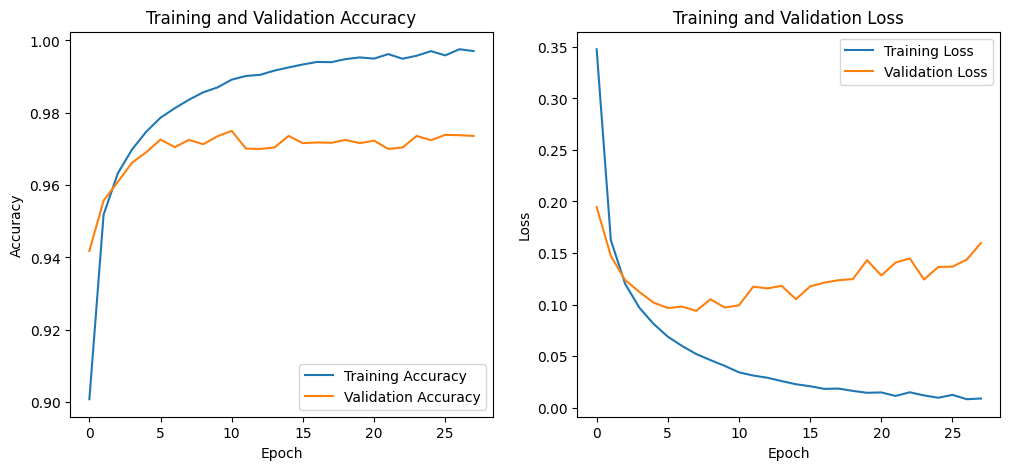


--- Evaluating on Test Data ---
Test loss: 0.0939
Test accuracy: 0.9725


'\ntraining_accuracy = history.history[\'accuracy\']\nvalidation_accuracy = history.history[\'val_accuracy\']\ntraining_loss = history.history[\'loss\']\nvalidation_loss = history.history[\'val_loss\']\n\n# The rest of the plotting code then uses these new variables...\n\nepoch_range = range(num_epochs)\nplt.subplot(1, 2, 1)\nplt.plot(epoch_range, training_accuracy, label = "Training Accuracy")\nplt.plot(epoch_range, validation_accuracy, label = "Value Accuracy")\nplt.legend(loc="lower right")\n\nplt.title("Training and Validation Accuracy")\nplt.subplot(1, 2, 2)\nplt.plot(epoch_range, training_loss, label="Training Loss")\nplt.plot(epoch_range, validation_loss, label="Value Accuracy")\nplt.legend(loc="lower right")\nplt.title("Training and Validation loss")\n\nplt.show()\n'

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping


import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # Downloads and loads the MNIST dataset for the project

x_train = x_train.reshape(60000, 28*28)
x_test =  x_test.reshape(10000, 28*28)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

model_classes = 10

y_train = keras.utils.to_categorical(y_train, model_classes)
y_test = keras.utils.to_categorical(y_test, model_classes)

model = keras.Sequential([

    keras.layers.Dense(50, activation = 'relu', input_shape=(784,)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(model_classes, activation='softmax')
])

model.summary()

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy', # multiclasses classification
    metrics = ['accuracy']
)


print('Model training begins') # Training and shows accuracy


# --- STEP 1: DEFINE THE RULE HERE ---
# Create the EarlyStopping callback object before you start training.
early_stopping = EarlyStopping(
    min_delta=0.001,       # Minimum amount of change to count as an improvement
    patience=20,           # How many epochs to wait for improvement before stopping
    restore_best_weights=True,
)

num_epochs = 100
history = model.fit(
    x_train, y_train,
    batch_size = 64,
    epochs = num_epochs,
    verbose=1, # Progress bar of the training
    validation_data = (x_test, y_test), # Data to check the performance of the training per iteration
    callbacks=[early_stopping] # Pass the rule
)




score = model.evaluate(x_test, y_test, verbose=0)



# The 'history' object from model.fit() contains the dictionary .history
# We extract the data into NEW variables. We do NOT re-assign the 'history' variable.

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a list of epoch numbers
# This dynamically gets the actual number of epochs that completed
epochs_range = range(len(training_accuracy))

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

# Finally, check the model's performance on the test set.
print("\n--- Evaluating on Test Data ---")
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')




"""
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# The rest of the plotting code then uses these new variables...

epoch_range = range(num_epochs)
plt.subplot(1, 2, 1)
plt.plot(epoch_range, training_accuracy, label = "Training Accuracy")
plt.plot(epoch_range, validation_accuracy, label = "Value Accuracy")
plt.legend(loc="lower right")

plt.title("Training and Validation Accuracy")
plt.subplot(1, 2, 2)
plt.plot(epoch_range, training_loss, label="Training Loss")
plt.plot(epoch_range, validation_loss, label="Value Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation loss")

plt.show()
"""




In [ ]:
# Round 2

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # ADDED: For plotting the confusion matrix
from sklearn.metrics import confusion_matrix # ADDED: For calculating the confusion matrix

# --- STEP 1: Load Data ---
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# --- STEP 2: Preprocess Data ---
# CHANGED: Use a variable for input size to avoid "magic numbers"
input_size = 28 * 28 
x_train = x_train.reshape(60000, input_size).astype('float32') / 255
x_test = x_test.reshape(10000, input_size).astype('float32') / 255

num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

# --- STEP 3: Build an Improved ANN Model ---
model = keras.Sequential([
    # CHANGED: Increased neurons slightly for more learning capacity
    keras.layers.Dense(128, activation='relu', input_shape=(input_size,)),
    
    # ADDED: Dropout layer. This is a key technique to prevent overfitting.
    # It randomly "turns off" 30% of neurons during training to make the model more robust.
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

# --- STEP 4: Compile the Model ---
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- STEP 5: Train the Model ---
print('\n--- Model Training Begins ---')
num_epochs = 16
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=num_epochs,
    verbose=1,
    validation_data=(x_test, y_test_cat)
)

# --- STEP 6: Evaluate and Visualize ---
print("\n--- Evaluating on Test Data ---")
score = model.evaluate(x_test, y_test_cat, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')


# --- Plotting Training History ---
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs_range = range(num_epochs)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# --- ADDED: Plotting a Confusion Matrix ---
print("\n--- Generating Confusion Matrix ---")
# Get model predictions
y_pred_probs = model.predict(x_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1) # Convert probabilities to class labels

# Compute the matrix
cm = confusion_matrix(y_test, y_pred_labels) # Note: use original y_test labels (0-9)

# Plot the matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Logic is for 2D data

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load and Prepare the Data ---

# Load the built-in MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Reshape the data for a CNN. We keep the 28x28 image structure
# and add a dimension for the color channel (1 for grayscale).
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255

# One-hot encode the integer labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# --- 2. Build the CNN Model ---

model = keras.Sequential([
    # --- Part 1: The CNN Feature Extractor ---
    # Layer 1: Finds 32 simple features (like edges and corners).
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Shrinks the image to make patterns more prominent.
    MaxPooling2D(pool_size=(2, 2)),
    
    # Layer 2: Finds 64 more complex features by combining the simple ones.
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # --- Part 2: The ANN Classifier ---
    # Flattens the 2D feature map into a 1D vector to feed into the classifier.
    Flatten(),
    
    # A standard Dense layer for classification.
    Dense(128, activation='relu'),
    
    # The output layer with 10 neurons, one for each digit.
    Dense(num_classes, activation='softmax')
])

model.summary()


# --- 3. Compile the Model ---

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# --- 4. Train the Model with Early Stopping ---

print('\n--- Model Training Begins ---')

# Define the EarlyStopping rule
early_stopping = EarlyStopping(
    patience=10,                # Stop if val_loss doesn't improve for 5 epochs
    restore_best_weights=True  # Restore the weights from the best epoch
)

# Set a high number of epochs; early stopping will find the optimal number
num_epochs = 50

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=num_epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping] # Pass the rule to the model
)


# --- 5. Evaluate and Visualize the Results ---

print("\n--- Evaluating on Test Data (Best Weights Restored) ---")
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

# Extract training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Get the actual number of epochs the model trained for
epochs_range = range(len(training_accuracy))

# Create plots
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

# Professor Sivapong, Create a CNN Lesson 17/10/2025

1 major difference:
implementation of convolutional layers (conv layers) operation -> convolution

Feature extraction: feature map
has the kernels enabled example a 3x3 matrix and it goes on the bigger image(original image)
-> multiplies and summation of the final result.

The larger the kernel -> the smaller the featuremap will be

convolution calculation

nxnx1
fxfx1
(n-f+1)*(n-f+1) x c

Generally a smaller kernel size like a 3x3 is better.

1x1 kernel size is used to add more numbers on the feature map (more numbers on the output)

it can only be bad when the model is overfitting of too much data.

stride: how to control the amount the kernel shifts
padding: prevent the problem of losing details in the corner of the image. Hence use padding to add some line pixels (filled with 0s)


Batch Normalisation: usually applied on the conv layers already .
-> optimise the output of the previous layers into a specific range. Helps with the gradient calculation.
(can help the problem of verfitting (rarely or sometimes)) - Depends on the decision made if I would want to use ; experiment on it

normalise the output from the previous layers (not much help of the overfitting much but usually help the calculations but not the overfitting)
- Helps with the gradient calculation as the numbers are more smooth(using differentiation and chain rules application)



Dropout layer:
randomly turns off the neurons in earlier layers. Lesser neurons to work with. If neurons are off the data passes through the neurons will have more distinctions between them (reduces overfitting basically)

Data augmentation -> Rescaling, rotating, flipping, zooming, etc.
(helps to create additional datasets to increase accuracy of the training model)

classification: similar to ANN


CNN -> don't use all the pixels of an image but uses pooling to obtain simpler features.





✅ Dataset directory: C:\Users\524yu\.keras\datasets\flower_photos
✅ Subfolders: ['daisy', 'dandelion', 'flower_photos', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']
Found 7340 files belonging to 6 classes.
Using 5872 files for training.
Found 7340 files belonging to 6 classes.
Using 1468 files for validation.
✅ Classes: ['daisy', 'dandelion', 'flower_photos', 'roses', 'sunflowers', 'tulips']
✅ Number of classes: 6

--- Model Summary ---


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     3,276,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,370,502 (12.86 MB)

 Trainable params: 3,370,502 (12.86 MB)

 Non-trainable params: 0 (0.00 B)


🚀 --- Model Training Begins ---
Epoch 1/30
184/184 - 79s - 430ms/step - accuracy: 0.4816 - loss: 1.3716 - val_accuracy: 0.4980 - val_loss: 1.2463
Epoch 2/30
184/184 - 73s - 398ms/step - accuracy: 0.4775 - loss: 1.2277 - val_accuracy: 0.4973 - val_loss: 1.1930
Epoch 3/30
184/184 - 72s - 389ms/step - accuracy: 0.4862 - loss: 1.1666 - val_accuracy: 0.4584 - val_loss: 1.2148
Epoch 4/30
184/184 - 68s - 368ms/step - accuracy: 0.4823 - loss: 1.0994 - val_accuracy: 0.4271 - val_loss: 1.1873
Epoch 5/30
184/184 - 67s - 365ms/step - accuracy: 0.4774 - loss: 1.0327 - val_accuracy: 0.3828 - val_loss: 1.2138
Epoch 6/30
184/184 - 67s - 365ms/step - accuracy: 0.4770 - loss: 0.9726 - val_accuracy: 0.3617 - val_loss: 1.2709
Epoch 7/30
184/184 - 68s - 370ms/step - accuracy: 0.4886 - loss: 0.9150 - val_accuracy: 0.2970 - val_loss: 1.3341
Epoch 8/30
184/184 - 73s - 398ms/step - accuracy: 0.4845 - loss: 0.8692 - val_accuracy: 0.2834 - val_loss: 1.3920
Epoch 9/30
184/184 - 73s - 396ms/step - accuracy: 0.487

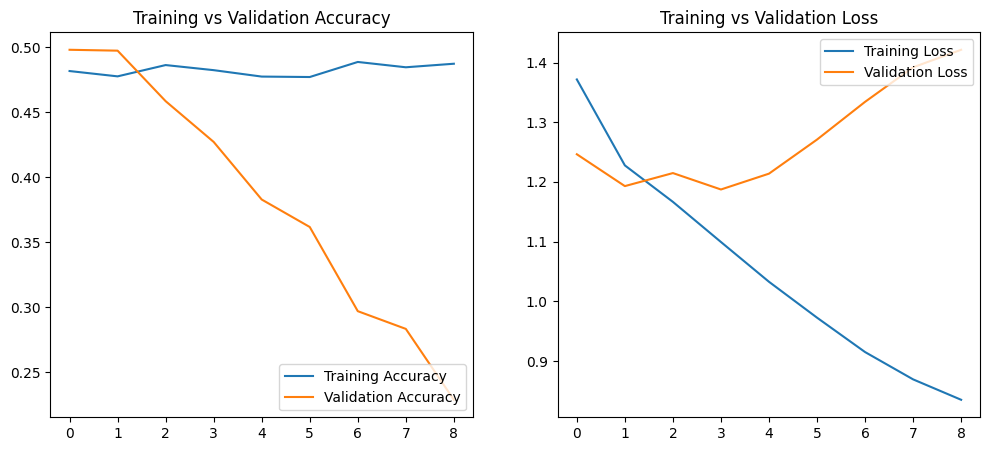

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


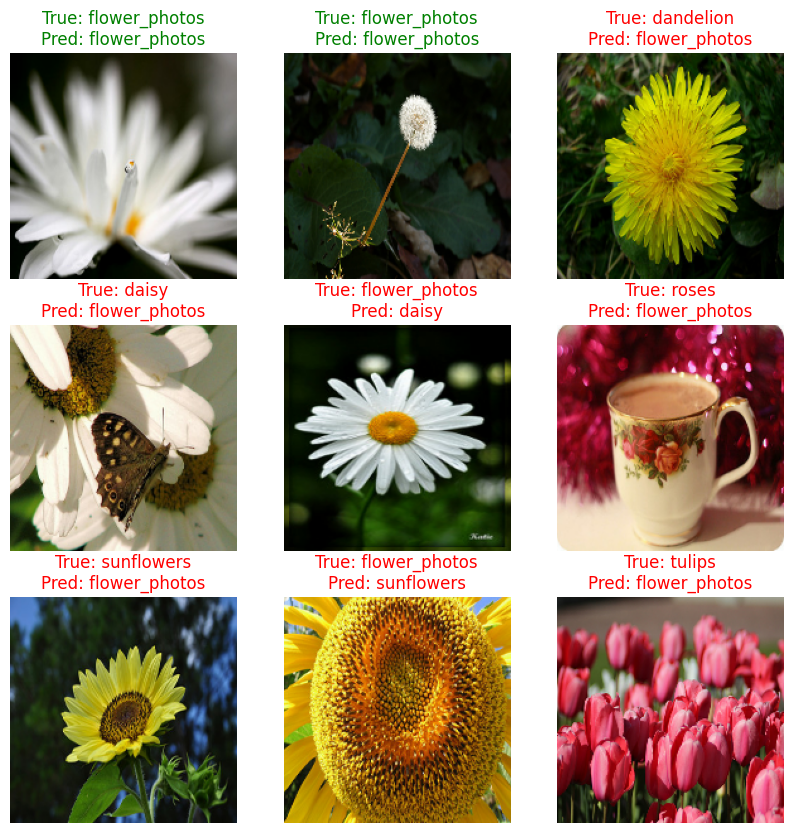

In [ ]:
# ======================================================
# 🌸 TensorFlow Flower Classification (Working Version)
# ======================================================

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pathlib
import os

# --- 1. Setup and Configuration ---
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # Show all logs

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

print("\n✅ Dataset directory:", data_dir)
print("✅ Subfolders:", [f.name for f in data_dir.iterdir()])

if not any(data_dir.iterdir()):
    raise ValueError("❌ Dataset directory is empty. Check dataset path.")

# --- 2. Image Parameters ---
image_height = 180
image_width = 180
batch_size = 32

# --- 3. Create Datasets (Train / Val) ---
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("✅ Classes:", class_names)
print("✅ Number of classes:", num_classes)

# Safety check
if num_classes < 2:
    raise ValueError(f"❌ Expected multiple classes, but got {num_classes}. Check dataset structure.")


# --- 4. Optimize data loading ---
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# --- 5. Define CNN Model ---
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(image_height, image_width, 3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n--- Model Summary ---")
model.summary()

# --- 6. Training Setup ---
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

print("\n🚀 --- Model Training Begins ---")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    verbose=2,
    callbacks=[early_stopping]
)

# --- 7. Evaluation ---
print("\n📊 --- Evaluating on Validation Data ---")
score = model.evaluate(val_ds, verbose=2)
print(f"✅ Validation Loss: {score[0]:.4f}")
print(f"✅ Validation Accuracy: {score[1]:.4f}")

# --- 8. Plot Training Curves ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

plt.show()

# --- 9. Optional: Predict sample images ---
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    predicted_labels = tf.argmax(preds, axis=1)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_label = class_names[labels[i]]
        pred_label = class_names[predicted_labels[i]]
        color = "green" if true_label == pred_label else "red"
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
        plt.axis("off")
    plt.show()
    break





In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

# Check what's in the directory
print("✅ Dataset directory:", data_dir)
print("✅ Contents:", list(data_dir.iterdir()))
print("✅ Subdirectories:", [f.name for f in data_dir.iterdir() if f.is_dir()])

# FIX: Handle nested folder structure
if (data_dir / 'flower_photos').exists():
    data_dir = data_dir / 'flower_photos'
    print("✅ Using nested directory:", data_dir)
    print("✅ Final subdirectories:", [f.name for f in data_dir.iterdir() if f.is_dir()])

image_height = 180
image_width = 180
batch_size = 32

# Create Training Set (80% of data)
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, # FIXED: Added validation_split
    subset="training",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

# Create Validation Set (20% of data)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, # FIXED: Added validation_split
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
num_classes = len(class_names)

# Optimize data loading performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # FIXED: Changed to sparse loss
    metrics=['accuracy']
)

model.summary()

# Train the Model
print('\n--- Model Training Begins ---')
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
num_epochs = 50

# FIXED: Corrected model.fit() call for tf.data.Dataset
history = model.fit(
    train_ds,
    epochs=num_epochs,
    verbose=1,
    validation_data=val_ds, # Pass the validation dataset directly
    callbacks=[early_stopping]
)

# --- The rest of your evaluation and plotting code is correct ---
print("\n--- Evaluating on Test Data (Best Weights Restored) ---")
# Note: For a proper final evaluation, you'd create a third 'test_ds' split
# For now, we'll evaluate on the validation set.
score = model.evaluate(val_ds, verbose=0)
print(f'Validation loss: {score[0]:.4f}')
print(f'Validation accuracy: {score[1]:.4f}')

# (Your plotting code can go here)

✅ Dataset directory: C:\Users\524yu\.keras\datasets\flower_photos_extracted
✅ Contents: [WindowsPath('C:/Users/524yu/.keras/datasets/flower_photos_extracted/flower_photos')]
✅ Subdirectories: ['flower_photos']
✅ Using nested directory: C:\Users\524yu\.keras\datasets\flower_photos_extracted\flower_photos
✅ Final subdirectories: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


c:\Users\524yu\OneDrive\Documents\VSCODEE\BMI-Robotic-Control\.venv-gpu\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 88, 88, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 44, 44, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 123904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │     3,964,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,984,517 (15.20 MB)

 Trainable params: 3,984,517 (15.20 MB)

 Non-trainable params: 0 (0.00 B)


--- Model Training Begins ---
Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 371ms/step - accuracy: 0.3188 - loss: 1.6377 - val_accuracy: 0.4891 - val_loss: 1.2434
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 327ms/step - accuracy: 0.5783 - loss: 1.0719 - val_accuracy: 0.5899 - val_loss: 1.0035
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 306ms/step - accuracy: 0.6979 - loss: 0.8201 - val_accuracy: 0.5926 - val_loss: 1.0110
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 296ms/step - accuracy: 0.8208 - loss: 0.5052 - val_accuracy: 0.5831 - val_loss: 1.1515
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 315ms/step - accuracy: 0.9169 - loss: 0.2740 - val_accuracy: 0.5954 - val_loss: 1.3585
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 293ms/step - accuracy: 0.9649 - loss: 0.1250 - val_accuracy: 0.5627 - val_loss: 1.8522
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 293ms/step - accuracy: 0.9799 - loss: 0.0919 - val_accuracy: 0.5981 - val_loss: 1.9513

--- Evaluating on Test Data (Best Weights Restored) ---
Validatio